In [7]:
import keras
import tensorflow as tf
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]
y_train = y_train[..., tf.newaxis]

In [9]:
model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation="softmax")
])


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9019 - loss: 0.3152 - val_accuracy: 0.9803 - val_loss: 0.0638
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9908 - val_loss: 0.0343
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9903 - loss: 0.0300 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9895 - val_loss: 0.0367
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9902 - val_loss: 0.0341


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nAcurácia no teste: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9839 - loss: 10.4668

Acurácia no teste: 0.9876


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


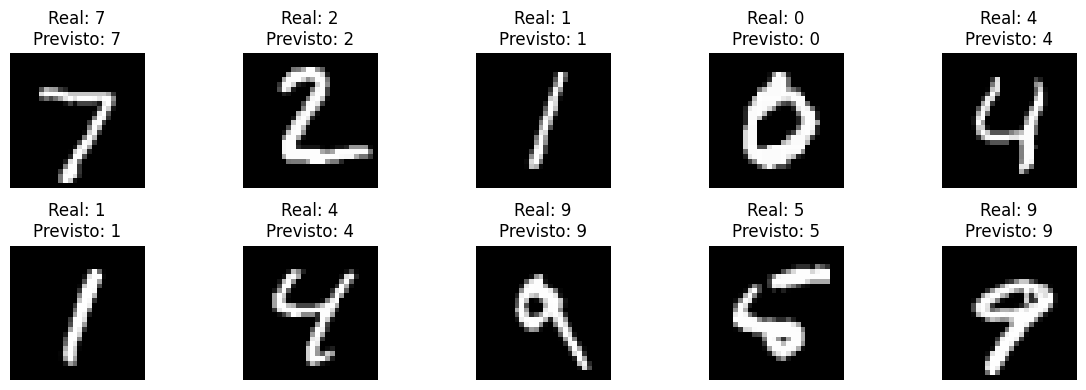

In [12]:
num_images = 10
predictions = model.predict(x_test[:num_images])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12,4))
for i in range(num_images):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].squeeze(), cmap='gray')
  plt.title(f"Real: {y_test[i]}\nPrevisto: {predicted_labels[i]}")
  plt.axis('off')
plt.tight_layout()